In [35]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [36]:
#Step-1 Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print("Dataset (first 5 rows):\n",df.head())

Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [37]:
#Step-2 EDA
print("\n Data Info:\n",df.info())
print("\nSummary Statistics:\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

 Data Info:
 None

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846

In [38]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

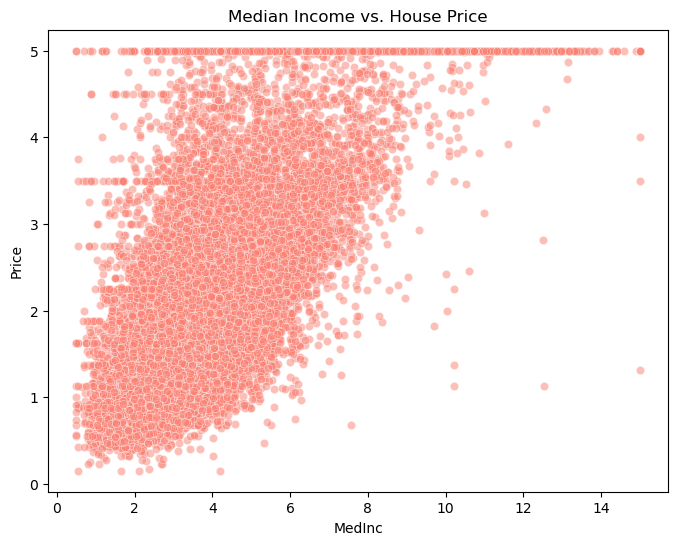

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5, color='salmon')
plt.title('Median Income vs. House Price')
plt.show()

In [40]:
print('\n Correlation with price:\n',df.corr()['Price'].sort_values())


 Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


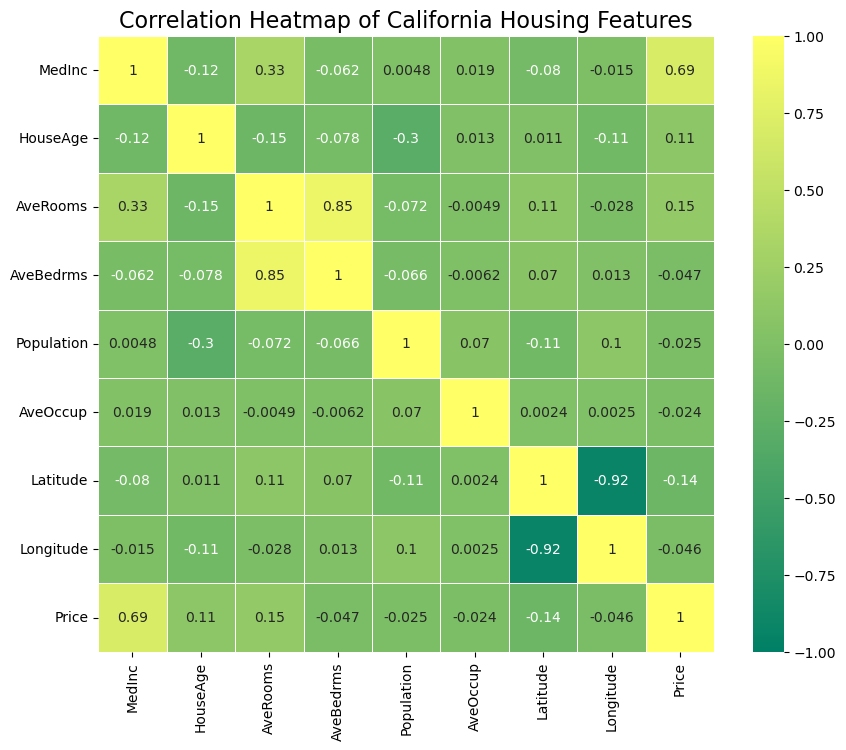

In [41]:
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='summer',
           vmin=-1,vmax=1,
           center=0,
           square=True,
           linewidths=0.5)

plt.title('Correlation Heatmap of California Housing Features',fontsize=16)
plt.show()

In [46]:
#Prepare data
x = df[['MedInc']]
y = df['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
#Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)
print(f"\nLinear Equation: Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")


Linear Equation: Price = 0.42 * MedInc + 0.44


In [50]:
#Predict and Evaluate
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(f"MAE : {mae:.2f} $100K")
print(f"RMSE : {rmse:.2f} $100K")
print(f"R² : {r2:.2f}")

MAE : 0.63 $100K
RMSE : 0.84 $100K
R² : 0.46


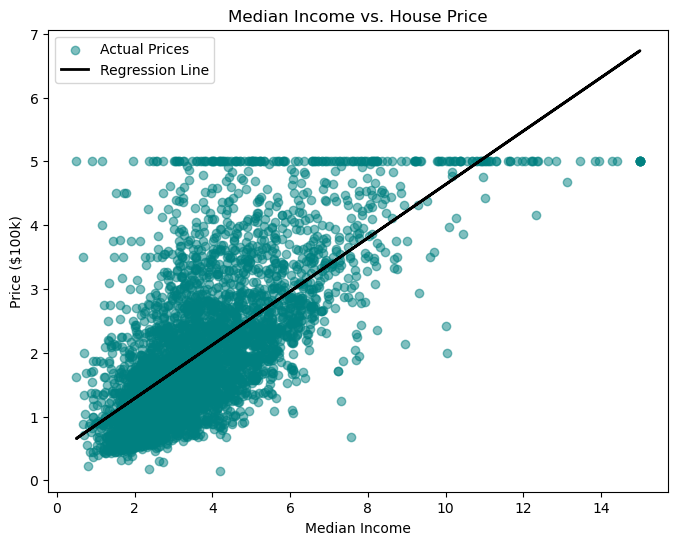

In [52]:
# Visualize
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='teal', label='Actual Prices',alpha=0.5)
plt.plot(x_test, y_pred, color='black', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Price ($100k)')
plt.title('Median Income vs. House Price')
plt.legend()
plt.show()

In [55]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


california = fetch_california_housing()


df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target


X = df.drop('Price', axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


In [57]:
#Step2-Calculate residuals
residuals=y_test-y_pred
print("\nFirst 5 residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


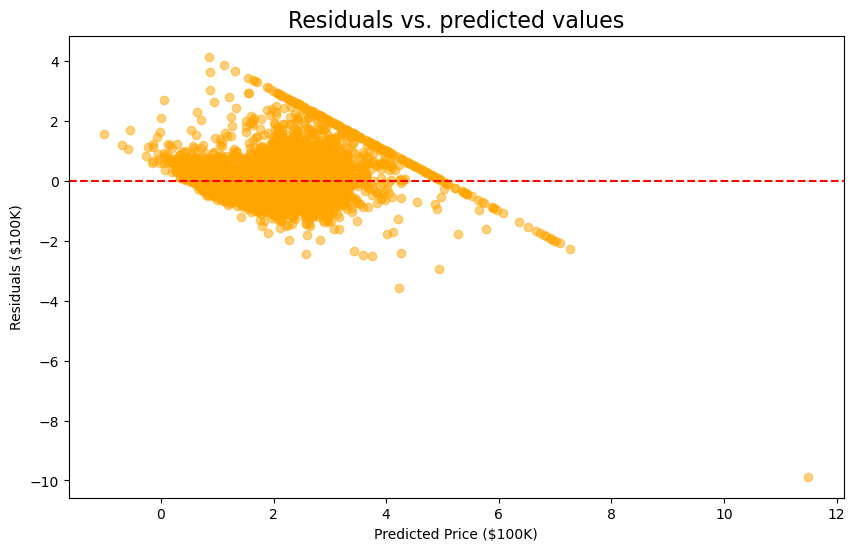

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='orange',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')  #Zero line
plt.title('Residuals vs. predicted values',fontsize=16)
plt.xlabel('Predicted Price ($100K)')
plt.ylabel('Residuals ($100K)')
plt.show()

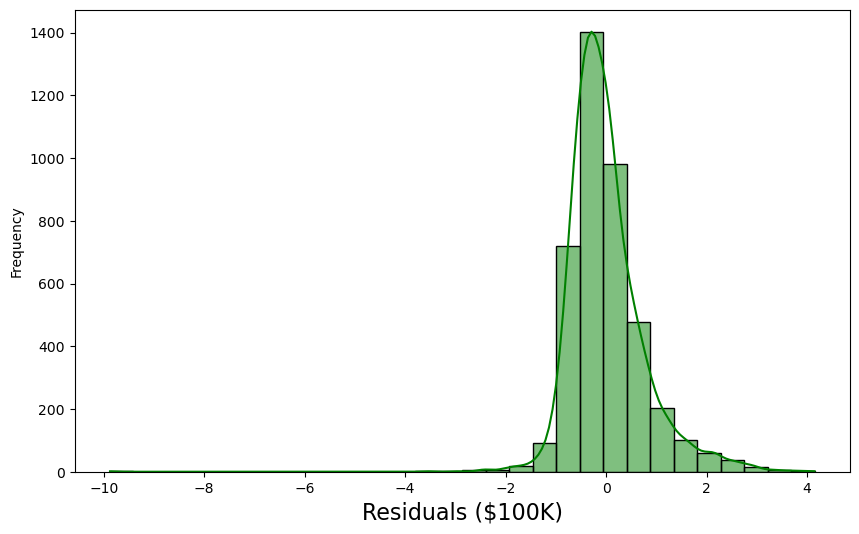

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='green')
plt.xlabel('Histogram of Residuals',fontsize=16)
plt.xlabel('Residuals ($100K)')
plt.ylabel('Frequency')
plt.show()

## Q-Q Plot(Normality Check

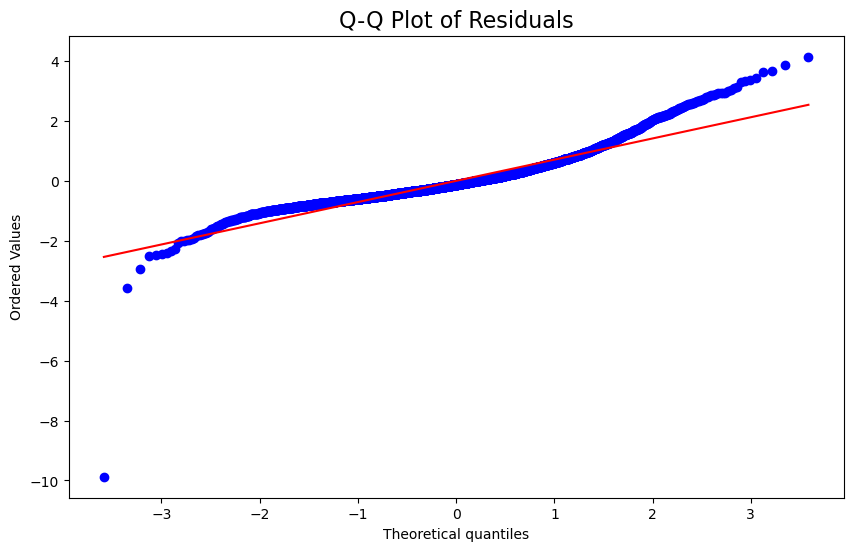

In [64]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

##Good: points follow the red line(normal)
##Bad: Big deviations, especially at ends
##Our case:Mostly linear, but tails curve off-non normal extremes (capping effect)

In [68]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

x,y=make_regression(n_samples=100,n_features=2,noise=10)

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,x,y,cv=kf,scoring='r2')
print('Cross-validation scores:',scores)
print('Average score',scores.mean())

Cross-validation scores: [0.95651165 0.93057413 0.96053155 0.95214082 0.93478133]
Average score 0.9469078971221231


In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import pandas as pd

x = df
y = california.target

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=kf, scoring='r2')

print('Cross-validation scores:', scores)
print('Average score:', scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average score: 1.0
